In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.graph_objects as go
plt.ioff()

In [2]:
df = pd.read_csv('./data/MBTA_2023_System-Wide_Passenger_Survey_Data.csv')

In [3]:
data = df[df['measure']=='Race']

In [4]:
data.head()

,aggregation_level,service_mode,reporting_group,measure_group,measure,category,weighted_percent,ObjectId
21,Reporting Group,Bus,104,Race and Ethnicity,Race,American Indian or Alaska Native,0.056090,22
22,Reporting Group,Bus,104,Race and Ethnicity,Race,Asian,0.174333,23
23,Reporting Group,Bus,104,Race and Ethnicity,Race,Black or African American,0.264286,24
24,Reporting Group,Bus,104,Race and Ethnicity,Race,Middle Eastern or North African,0.047634,25
25,Reporting Group,Bus,104,Race and Ethnicity,Race,Native Hawaiian or other Pacific Islander,0.009066,26


In [5]:
data.to_csv('race_by_bus.csv', index=False)

In [6]:
bus_ids = data['reporting_group'].unique()

In [7]:
bus_ids

array(['104', '1', '11', '10', '111', '21', '16', '114, 116, & 117', '15',
       '23', '34 & 34E', '22', '32', '28 & 29', '47', '43 & SL5', '39',
       '4 & 7', '57', '66', '61 & 70', '67 & 77', '71', '73',
       'Brighton/Allston/Watertown - Boston', '9', '86', '8, 55 & CT3',
       'Cambridge/Arlington - Harvard', 'Cambridge/Arlington - Alewife',
       'Brighton/Allston/Watertown - Other Suburb',
       'Chelsea/East Boston/Lynn/Revere - North Shore',
       'Chelsea/East Boston/Lynn/Revere - Core', 'Malden/Everett - North',
       'Quincy - East', 'Jamaica Plain/Roslindale/Hyde Park',
       'Malden/Everett - South', 'SL4',
       'Roxbury/Dorchester/Mattapan/South End - East', 'Quincy - West',
       'Roxbury/Dorchester/Mattapan/South End - West',
       'Roxbury/Dorchester/Mattapan/South End & Jamaica Plain/Roslindale/Hyde Park',
       'Somerville/Medford/Charlestown - East', 'Fitchburg Line',
       'Fairmount Line', 'Somerville/Medford/Charlestown - West',
       'Framingha

In [8]:
important_routes = [ '22', '29', '15', '45', '44', '42', '17', '23', '31', '26', '111', '24', '33', '14']

In [9]:
len(important_routes)

14

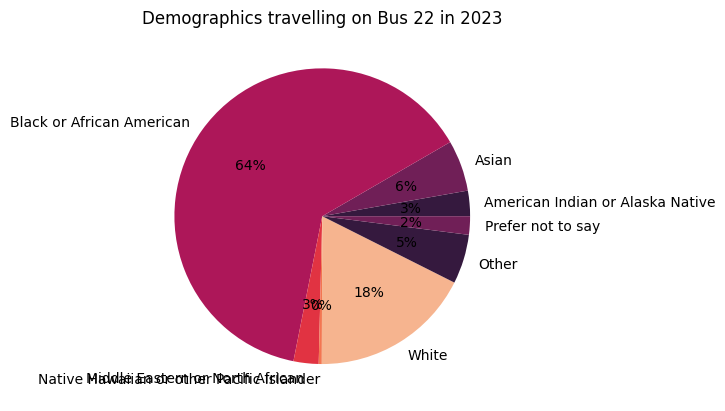

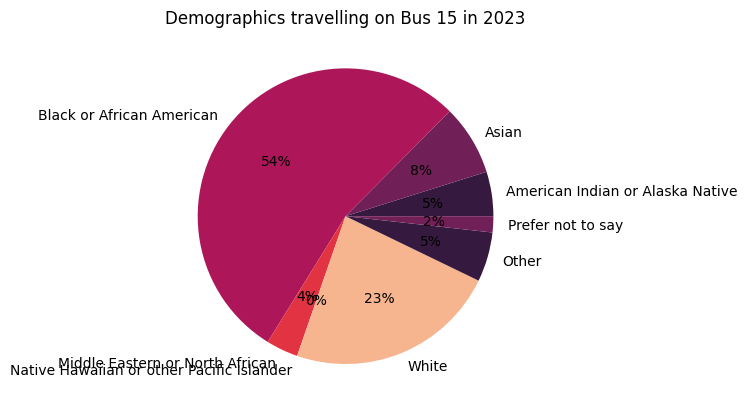

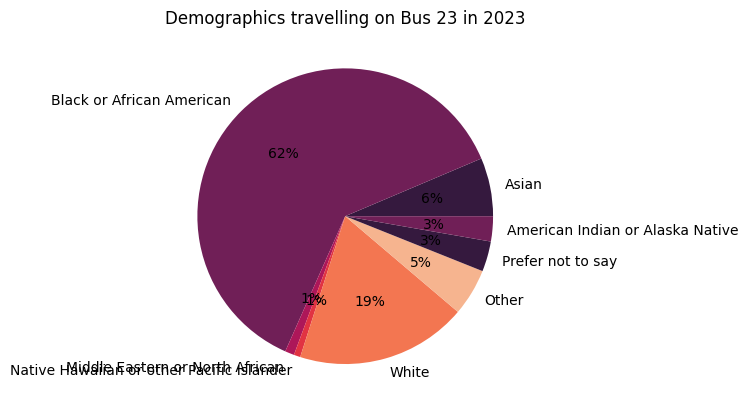

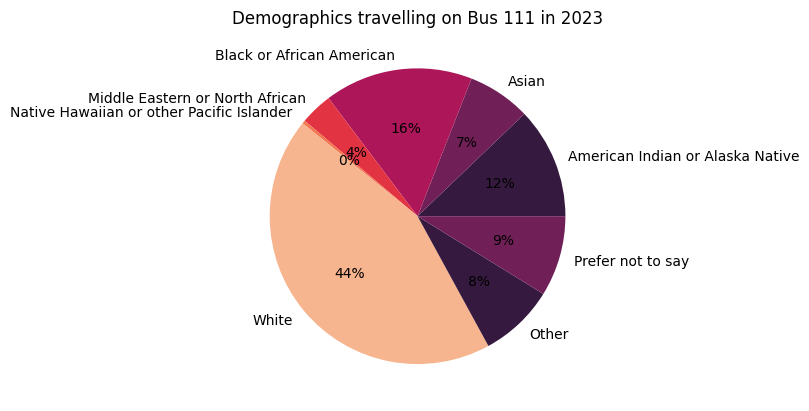

In [10]:
import matplotlib.pyplot as plt
for bus in important_routes:
    bus_data = data[data['reporting_group'] == bus]
    if len(bus_data) == 0:
        continue
    vals = bus_data['weighted_percent']
    labels = bus_data['category']
    plt.pie(vals, labels=labels, autopct='%.0f%%', colors=sns.color_palette("rocket"))
    plt.title(f"Demographics travelling on Bus {bus} in 2023")
    # plt.savefig(f"./Plots/Demographics_Survey/{bus}.png")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # Helps with label placement


plt.ioff()
for bus in important_routes:
    bus_data = data[data['reporting_group'] == bus]
    if len(bus_data) == 0:
        continue
    vals = bus_data['weighted_percent']
    labels = bus_data['category']
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        vals, labels=labels, autopct='%.0f%%', colors=sns.color_palette("rocket"),
        startangle=140, wedgeprops={'edgecolor': 'black'}
    )

    # Improve label placement
    for text in texts + autotexts:
        text.set_fontsize(10)  # Adjust font size
        text.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Background for visibility

    # Adjust text positions dynamically
    adjust_text(texts + autotexts, expand_text=(1.2, 1.5))

    # Title
    plt.title(f"Demographics Travelling on Bus {bus} in 2023", fontsize=14)

    # Save and show
    # plt.savefig(f"./Plots/Demographics_Survey/{bus}.png", dpi=300, bbox_inches='tight')

    fig_plotly = go.Figure(data=[go.Pie(labels=labels, values=vals, hole=.3)])
    fig_plotly.update_layout(
        title_text=f"Demographics Travelling on Bus {bus} in 2023",
    )
    fig_plotly.show()
    fig_plotly.write_html(f"./Plots/Demographics_Survey/{bus}.html")
    # plt.show()